# Data Analytics Summer School
2019 Edition (Jesse Harrison, Anni Pyysing)

# 2. Hands-on Session: Data Manipulation and Plotting 

### "A picture is worth a thousand words" - but how to make this picture?
In this session we will learn how to take a data set and manipulate it into a form that enables you to tell the story that you want to convey. We will use two packages that come as part of 'tidyverse' (a collection of packages for data processing and visualization): dplyr and ggplot2. Tidyverse has rapidly become one of the most popular choices for this type of work - if you're planning to use R in the future, you will most likely come across it again!

If the coding in this session is too heavy for you, try to absorb the ideas and focus on the possibilities of visualizations.

# Part 1: Tidyverse and dplyr

Tidyverse includes a collection of R packeges designed for data science. It includes several separate packages, such as dplyr and ggplot2. You could also load these packages separately, if you wanted to. More information on tidyverse can be found on the official website:

https://www.tidyverse.org/

### dplyr

This is a package that has a set of functions or "data manipulation verbs", including: 

`mutate()`, `select()`, `filter()`, `summarize()`, `arrange()`, and `group_by()`

In the following exercises, we will cover a selection of these to give you an idea of how the package works in practice.

First, let's load the tidyverse package:


In [1]:
# Run this cell by clicking and ctrl-ENTER or by clicking the play button

library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Read in the data

First we need to get the data into a good format, which can require a little or a lot of work.

We'll practice with a pre-arranged dataset from Sotkanet (https://sotkanet.fi/sotkanet/en/index). Sotkanet has plenty of statistical information on welfare and health in Finland, but we have taken a small set of data from there to play with.

Let's begin with importing a CSV file containing the data into R:

In [2]:
sotkanet <- read.csv("data/sotkanet_data.csv")

The data are now inside R's memory. Let's have a look at how the data frame is structured:

In [3]:
head(sotkanet, 5)
str(sotkanet)

X,year,region,population,education_level
1,2008,Akaa,16837,284
2,2008,Alajärvi,10634,253
3,2008,Alavieska,2759,246
4,2008,Alavus,12706,244
5,2008,Asikkala,8604,278


'data.frame':	3110 obs. of  5 variables:
 $ X              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ year           : int  2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 ...
 $ region         : Factor w/ 311 levels "Äänekoski","Ähtäri",..: 3 4 5 6 7 8 9 10 11 12 ...
 $ population     : int  16837 10634 2759 12706 8604 4761 3852 518 921 1652 ...
 $ education_level: int  284 253 246 244 278 270 277 258 218 228 ...


## Using data manipulation functions in R 

We are now ready to start shaping the data using the functions outlined above. First we can `filter()` the dataset to contain only observations from Helsinki, Espoo and Kajaani and from the year 2016 onwards:

In [4]:
# filter()

small_set <- filter(sotkanet, region %in% c("Helsinki","Espoo","Kajaani") & year > 2015 )
small_set

X,year,region,population,education_level
2500,2016,Espoo,274583,471
2522,2016,Helsinki,635181,438
2558,2016,Kajaani,37521,357
2811,2017,Espoo,279044,476
2833,2017,Helsinki,643272,446
2869,2017,Kajaani,37239,362


We might also decide that we no longer need the education level data. One way to leave it out is using the `select()` function:

In [5]:
# select()

small_set <- select(small_set, X, year, region, population)
small_set

X,year,region,population
2500,2016,Espoo,274583
2522,2016,Helsinki,635181
2558,2016,Kajaani,37521
2811,2017,Espoo,279044
2833,2017,Helsinki,643272
2869,2017,Kajaani,37239


You've probably noticed that, even after filtering, the data set contains information spanning a couple of years (2016 and 2017). The dplyr package comes with a very useful function called `group_by()`, which enables us to group our data by a variable of interest. Here, we can use it to group the entire data set based on the year when the measurements were collected. After this, we can also use `summarize()` to calculate population summaries for each year:

In [6]:
# Group_by()

grouped_set <- group_by(small_set, year)

# Summarize() (population sizes)

summared_set <- summarize(grouped_set, sum_population = sum(population))

# Check what they look like

grouped_set
summared_set

X,year,region,population
2500,2016,Espoo,274583
2522,2016,Helsinki,635181
2558,2016,Kajaani,37521
2811,2017,Espoo,279044
2833,2017,Helsinki,643272
2869,2017,Kajaani,37239


year,sum_population
2016,947285
2017,959555


One of the most powerful functions inside the entire tidyverse is called `mutate()`. Its purpose may be difficult to guess based on the name alone, but essentially we can use it to create entirely new variables inside our data set, based on calculations or other operations done using existing variables. For example, we might want to create a variable which is the sum of the variables 'year' and 'population'. Another example is to create new row labels by pasting together information from two different columns.

In [7]:
# Mutate() the small_set created previously and create two new variables

small_set <- mutate(small_set, mutation1 = year+population, mutation2 = paste0(region,X))

small_set

X,year,region,population,mutation1,mutation2
2500,2016,Espoo,274583,276599,Espoo2500
2522,2016,Helsinki,635181,637197,Helsinki2522
2558,2016,Kajaani,37521,39537,Kajaani2558
2811,2017,Espoo,279044,281061,Espoo2811
2833,2017,Helsinki,643272,645289,Helsinki2833
2869,2017,Kajaani,37239,39256,Kajaani2869


### Exercise: putting dplyr to work

We've now covered a number of useful features for data manipulation in the dplyr package (a part of tidyverse). Next, try working with the sotkanet data set by yourself - you can start with the original unfiltered data set and create something new using the various functions above. For example, you could start by grouping the data by the region rather than the year, or you could use the `filter()` command to look at cities that we didn't inspect so far.

In [8]:
new_set <- filter(sotkanet, year > 2015 )

new_set <- select(new_set, X, year, region, population)

grouped_set <- group_by(new_set, region)

summared_set <- summarize(grouped_set, sum_population = sum(population))

# Check what they look like

head(grouped_set,10)
head(summared_set,10)

X,year,region,population
2489,2016,Akaa,16923
2490,2016,Alajärvi,9899
2491,2016,Alavieska,2639
2492,2016,Alavus,11907
2493,2016,Asikkala,8323
2494,2016,Askola,5046
2495,2016,Aura,3984
2496,2016,Brändö,471
2497,2016,Eckerö,928
2498,2016,Enonkoski,1453


region,sum_population
Äänekoski,38518
Ähtäri,11891
Akaa,33692
Alajärvi,19730
Alavieska,5249
Alavus,23620
Asikkala,16571
Askola,10036
Aura,7975
Brändö,923


## More data wrangling functions: spread() and gather()
 
Another tidyverse package, tidyr, has two very powerful data wrangling functions. These will help you to make columns out of rows and vice versa.

First, let's take our small_set data and spread years to columns.

In [9]:
# spread

# first, select only useful variables
tiny_set <- select(small_set, region, population, year)
tiny_set

# second, spread
tiny_spread <- spread(tiny_set, key = year, value = population)
tiny_spread

region,population,year
Espoo,274583,2016
Helsinki,635181,2016
Kajaani,37521,2016
Espoo,279044,2017
Helsinki,643272,2017
Kajaani,37239,2017


region,2016,2017
Espoo,274583,279044
Helsinki,635181,643272
Kajaani,37521,37239


In [10]:
# gather

# gather is the opposite of spread

# notice that here you need to name the "new", columns that we make (year and population)
# AND select which columns to gather (2016 ans 2017)

gather(tiny_spread, key = year, value = population, "2016", "2017")

region,year,population
Espoo,2016,274583
Helsinki,2016,635181
Kajaani,2016,37521
Espoo,2017,279044
Helsinki,2017,643272
Kajaani,2017,37239


### Exercise: Spread by region

Take the small_set dataframe and spread it by region. Also, try to gather the results


In [11]:
# spread
tiny_spread2 <- spread(tiny_set, key = region, value = population)
tiny_spread2

# gather
gather(tiny_spread2, key = region, value = population, "Espoo", "Helsinki", "Kajaani")

year,Espoo,Helsinki,Kajaani
2016,274583,635181,37521
2017,279044,643272,37239


year,region,population
2016,Espoo,274583
2017,Espoo,279044
2016,Helsinki,635181
2017,Helsinki,643272
2016,Kajaani,37521
2017,Kajaani,37239


### Extra example (diffuculty warning)

Let's say we want to really mutate our data, and turn our education level column into a categorical variable instead of numeric.

There are many ways to do this, but cutting and mutating is one. Let's start by creating category limits for the education level.


In [12]:
# Check what are max and min of education level
min(sotkanet$education_level)
max(sotkanet$education_level)

[1] 176

[1] 589

In [13]:
# Let's create a sequence of numbers between minimum and maximum of education level, 4 points in total
points <- seq(min(sotkanet$education_level), max(sotkanet$education_level), length.out=4)
points

[1] 176.0000 313.6667 451.3333 589.0000

In [14]:
# Make new variable called category by cutting our numeric variable into classes
sotkanet <- mutate(sotkanet, category=cut(education_level, breaks=points, labels=c("low","middle","high"),
                                         include.lowest = TRUE))
# print the head
head(sotkanet)

X,year,region,population,education_level,category
1,2008,Akaa,16837,284,low
2,2008,Alajärvi,10634,253,low
3,2008,Alavieska,2759,246,low
4,2008,Alavus,12706,244,low
5,2008,Asikkala,8604,278,low
6,2008,Askola,4761,270,low


In [15]:
# Compare numbers of categories by year and by region

# group by year AND category
grouped <- group_by(sotkanet, year, category)

# summarize by counting values
summed <- summarize(grouped, count = n())

# spread values
separated <- spread(summed, key = category, value = count)

# print result
separated

year,low,middle,high
2008,261,49,1
2009,256,53,2
2010,253,56,2
2011,246,63,2
2012,239,70,2
2013,235,74,2
2014,226,83,2
2015,218,91,2
2016,212,97,2
2017,194,115,2


## Exercise related to extra example

Would you say the categories we just made are good?

Make better categories (style is free, maybe look up quantile()) and perform some analysis.

Function table() is useful to check how the categories are represented

In [16]:
# Modify the code below or make your own

points <- quantile(sotkanet$education_level)

sotkanet <- mutate(sotkanet, category=cut(education_level, breaks=points,
                                          labels=c("low","lower-middle","higher-middle", "high"),
                                          include.lowest = TRUE))

table(sotkanet$category)


          low  lower-middle higher-middle          high 
          795           779           766           770 

# Part 2: Visualizations using ggplot2

Some of the exercises in the morning session involved creating simple plots using "base R" graphics (that is, packages that come as part of a default R installation). We also learnt that the basic capabilities of R can be greatly enhanced through the use of additional packages. The package ggplot2 is most likely the most popular package for data visualization in R. Let's have a closer look at it here!

First some initial preparations:

In [17]:
# Read in the data again, just in case you already lost it

rawdata <- read.csv("data/sotkanet_data.csv")

# Turn off scientific notation (eg. 6e+05) for easier-to-read plots
options(scipen = 999)

# Have a look at the data frame structure
str(rawdata)

'data.frame':	3110 obs. of  5 variables:
 $ X              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ year           : int  2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 ...
 $ region         : Factor w/ 311 levels "Äänekoski","Ähtäri",..: 3 4 5 6 7 8 9 10 11 12 ...
 $ population     : int  16837 10634 2759 12706 8604 4761 3852 518 921 1652 ...
 $ education_level: int  284 253 246 244 278 270 277 258 218 228 ...


We can see four Integer variables and one Factor. First, for plotting purposes, we may want to reclassify 'year' so that it becomes a Factor instead. Can you think of reasons why? 

In [18]:
rawdata$year <- as.factor(rawdata$year)

Just a few pre-processing steps before we can start thinking about how ggplot2 works, and putting our knowledge to use. Let's create subsets of the data for Helsinki only, as well as a larger one containing information for Tampere, Oulu and Jyväskylä.

In [19]:
# Just Helsinki
helsinki <- filter(rawdata, region == "Helsinki")

In [20]:
# Creating a name vector for obtaining the larger subset
citynames <- c("Tampere", "Oulu", "Jyväskylä")

In [21]:
# Create the larger subset
threecities <- rawdata %>% 
  filter(region %in% citynames)

## ggplot2 syntax: basics and simple data frames

We're ready to start working with ggplot2! The syntax surrounding this package differs somewhat from what we might already be used to. However, it's very quick to follow once you learn the basics.

There are four main parts to a basic ggplot2 visualisation:

1. The `ggplot()` function
2. The data parameter (always a data frame)
3. The `aes()` function which accepts 'mapping' rules (we'll get to that soon), and 
4. The `geom()` function

With the separate elements pieced together, we get the following:

`ggplot(dataframe, aes(mapping)) + geom()`

Details given to the `aes()` function are called 'aesthetic mappings' (they describe how variables in the data are mapped to geoms). If this sounds like lots of jargon, you're completely right! However, the way this works is will become clear as we move through the examples.

To start with, let's have a look at changes in the education level in Helsinki over time. We can start with supplying the `ggplot()` function, specifying a data frame and the mappings (in other words, what goes on the x and y axes):

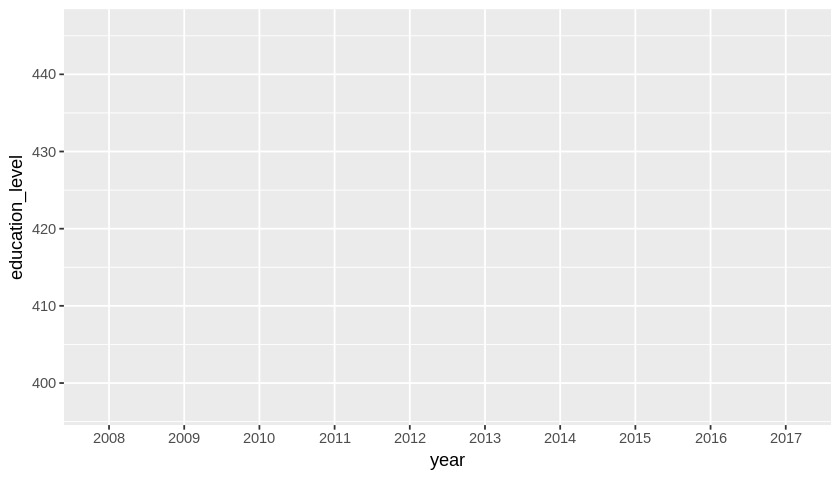

In [22]:
options(repr.plot.height = 4)
ggplot(helsinki, aes(x = year, y = education_level))

A blank ggplot is drawn. This is because we haven't yet told ggplot what type of plot we want to create! For this we need the `geom()` function. In reality this function comes in many different flavours and they are very intuitively named. For example, the geom for creating a scatter plot is called `geom_point()`:

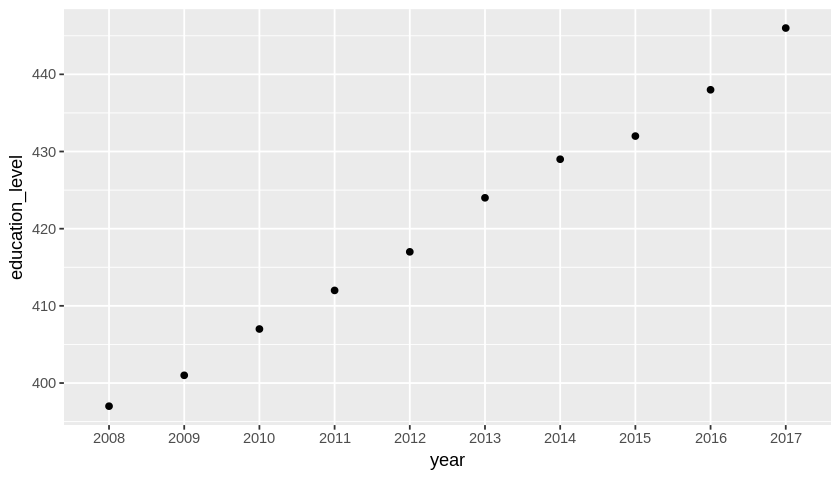

In [23]:
ggplot(helsinki, aes(x = year, y = education_level)) + 
  geom_point() # a clear rising trend!

One of the key features of ggplot2 syntax is its stackability (in other words, we can easily add additional lines of code that modify the plot further). Aside from the four main components needed to create a plot, there are many optional parts that can be added.

For example, we can use `ylab()` and `xlab()` to specify the axis labels:

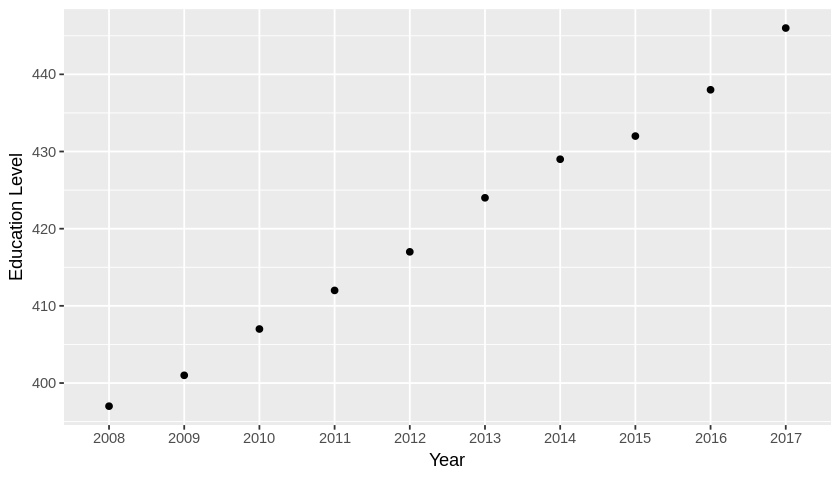

In [24]:
ggplot(helsinki, aes(x = year, y = education_level)) + 
  geom_point() +
  ylab("Education Level") +
  xlab("Year") 

Some other things that we can do:

- give the plot a general title using `ggtitle()`.
- set axis limits using `xlim()` and `ylim()`. e.g. `xlim(c(2008, 2012))` would restrict the years to 2008 - 2012.
- change the colour and size of the dots by adding information inside the `geom()` function (which is currently empty). For example, `geom_point(col = "steelblue", size = 3)` would change both the colour and size of the dots.

### Exercises: plots using the Helsinki data

To get used to all this, try modifying the plot. For example, try using the helsinki data set to create a plot with the title "Education level over time", showing data since 2010 as red dots. 

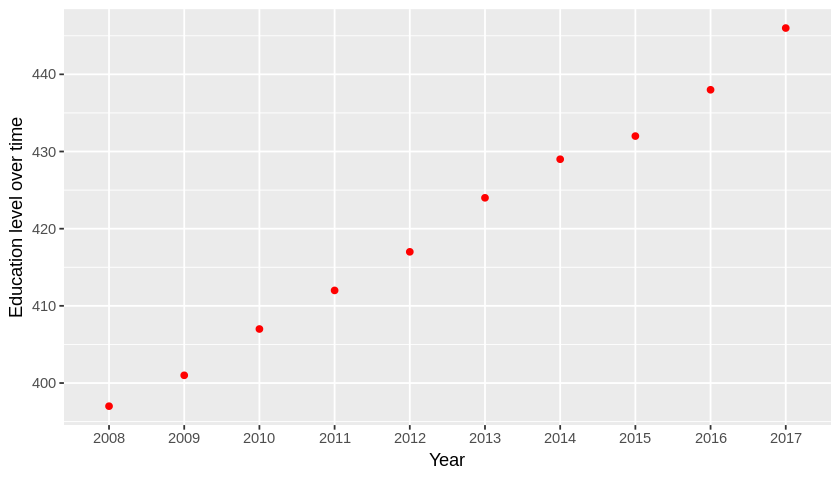

In [27]:
# Add your own dot plot here!
ggplot(helsinki, aes(x = year, y = education_level)) + 
  geom_point(col = "red") +
  ylab("Education level over time") +
  xlab("Year") 

Next, you could try making a bar plot (can you guess the geom)?

One note: to create the bar plot, you will need to add the following code inside the `geom()` function:
`stat = "identity"`

Adding this tells the geom that we want to use the y values as they are. It may feel a little counter-intuitive, but the default format for bar plots in ggplot is to use `stat = "bin"`, which counts frequencies within each group (in our case, we have just a single measurement for each year).

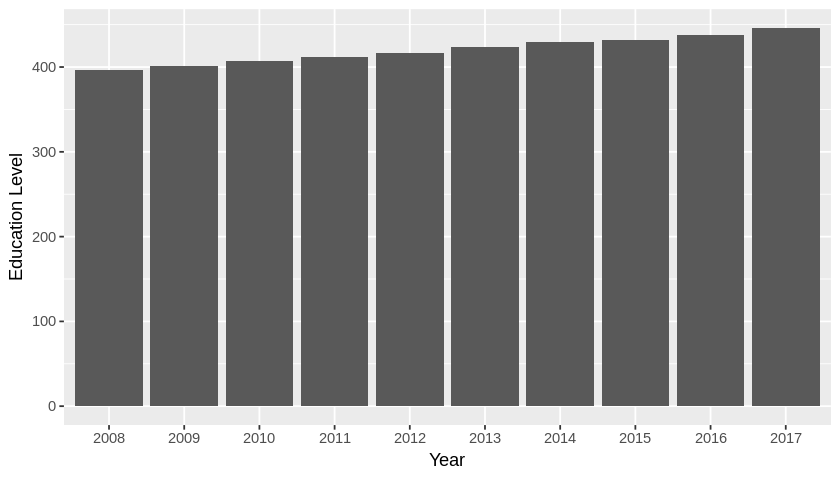

In [28]:
# Add your own bar plot here!
ggplot(helsinki, aes(x = year, y = education_level)) + 
  geom_bar(stat = "identity") +
  ylab("Education Level") +
  xlab("Year") 

If you managed to get this working, try also plotting the data as a line plot (the geom name is easy to guess).
For this step to work, you will also need to convert the factor 'year' back to integer format. You might remember that before we already converted it to a factor!

One more question to think about: which of the three plot types do you think works best for displaying the data?

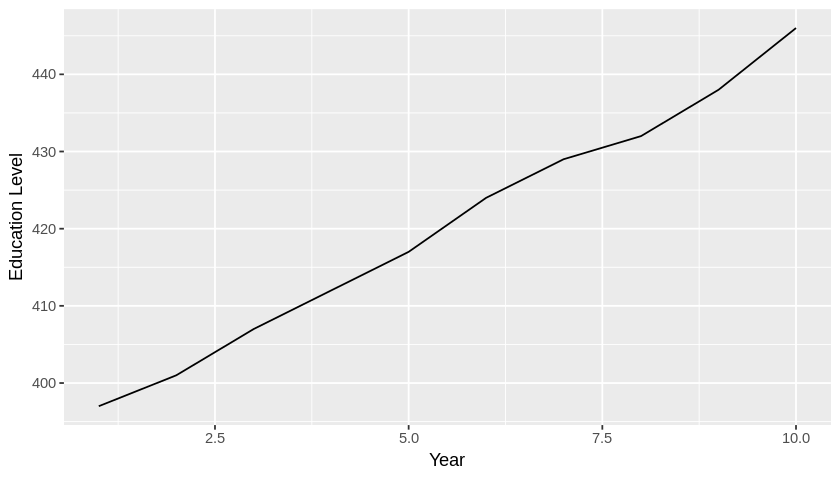

In [29]:
# Add your own line plot here!
helsinki$year <- as.integer(helsinki$year)

ggplot(helsinki, aes(x = year, y = education_level)) + 
  geom_line() +
  ylab("Education Level") +
  xlab("Year") 

## more ggplot2 syntax: slightly more complex data frames and facetting

Instead of just the Helsinki data, let's now look at the larger subset with data for three cities.

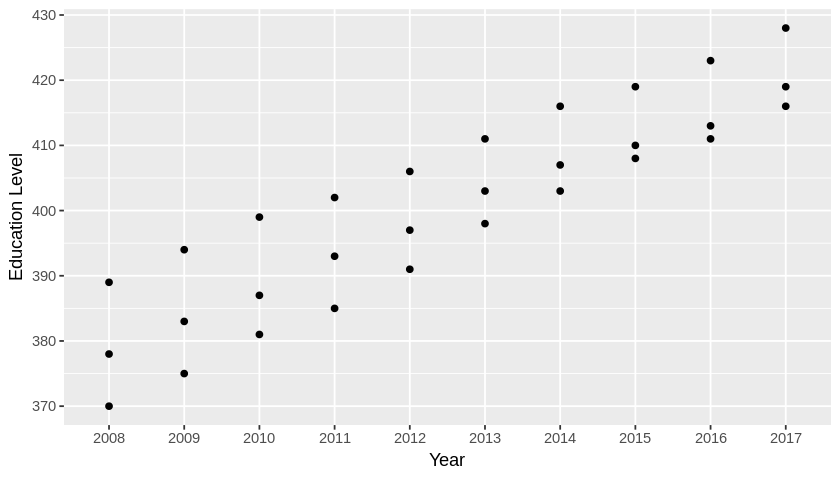

In [25]:
ggplot(threecities, aes(x = year, y = education_level)) + 
  geom_point() +
  ylab("Education Level") +
  xlab("Year") 

All show a similar rising trend but which one is which?

Adding `col = region` inside the `aes()` function can be used to plot different colours for each region.

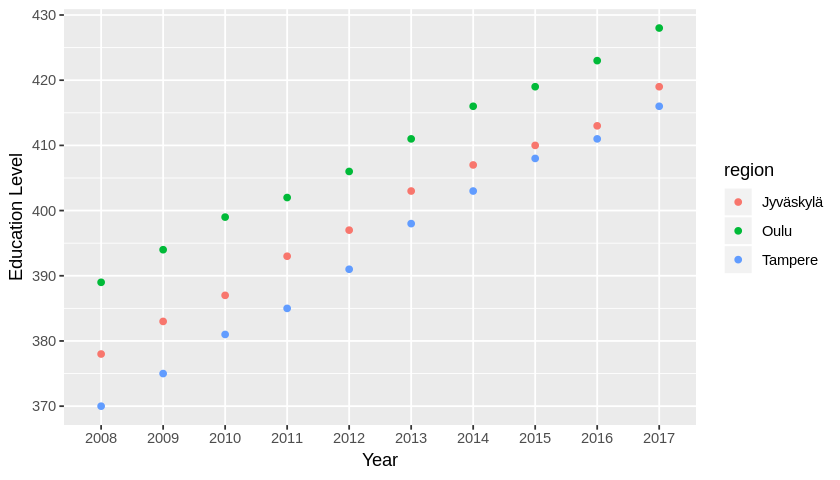

In [26]:
ggplot(threecities, aes(x = year, y = education_level, col = region)) + 
  geom_point() +
  ylab("Education Level") +
  xlab("Year")

In this data set the scores for the three cities are quite closer to another, and plotting everything inside a single panel is quite easy.
However, there may also be cases where it's better to separate the data and plot them side by side in separate panels. For this, we have a simple command that can be added to your ggplot code:

`facet_grid()`

We can tell `facet_grid()` to separate the data by a specific variable in the data using the '~' symbol, followed by the variable of interest. For example:

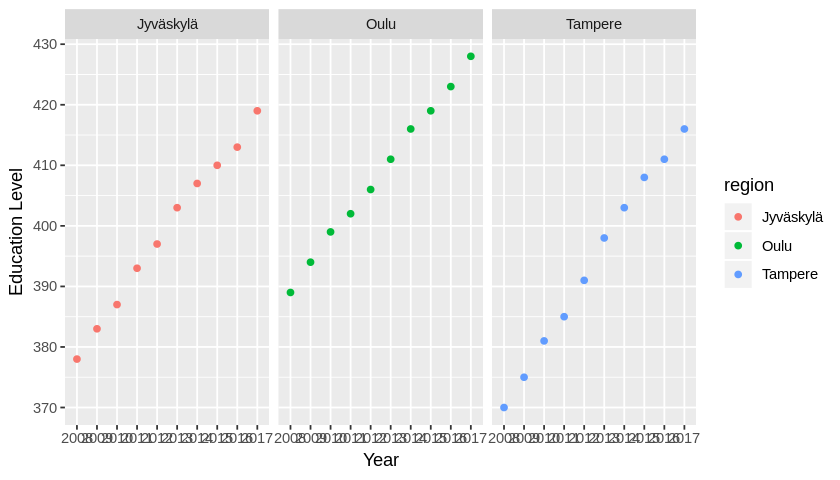

In [30]:
ggplot(threecities, aes(x = year, y = education_level, col = region)) + 
  geom_point() +
  facet_grid(~ region) +
  ylab("Education Level") +
  xlab("Year")

That looks quite clear too, aside from the year labels that look a little squeezed in. It would be quite easy to fix this with some additional code, but for now we can already be happy with what we've created. If you've come this far, you've already learnt a fair deal about ggplot2!

### Exercise: further work with the 'threecities' data set (and a link to more info)

There is a column in the 'threecities' data set that we haven't looked at yet: 'population'. Feel free to play around and try creating different types of plots, using the knowledge we've gained so far. 

A possible source of inspiration: although we've covered lots of ground, there is much more to discover with regard to ggplot2 and different ways to visualize your data using it. Many more functions and plot styles exist and you can check out this ggplot2 'cheat sheet' to get a quick idea of what else is out there:

https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf

If you're looking for an extra challenge, also feel free to try out some of these entirely new commands in the cheat sheet!